### Libraries

In [1]:
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

import leafmap
import math
import shapely
import h3
import pandas as pd
import numpy as np

/tmp/ipykernel_80723/1956489818.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. Fo

### GeoDataFrame Object of 'Espacios Públicos en GDL'

In [2]:
schema = 'espacios_publicos'
table = 'ep_amg'
gdf = aup.gdf_from_db(table,schema)
gdf.head()

,Fuente,Tipo,Uso,geometry
0,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672507.028 2272132.201, 672520.126 2..."
1,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672520.126 2272170.353, 672507.028 2..."
2,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672494.325 2272095.205, 672480.366 2..."
3,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672480.366 2272060.731, 672494.325 2..."
4,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672468.717 2272020.613, 672456.895 2..."


In [3]:
gdf.shape

(8499, 4)

In [4]:
gdf['Tipo'].unique()

array(['Parque', 'Espacio verde vecinal', 'Glorieta', 'Camellón',
       'Área natural', 'Unidad deportiva', 'Plaza',
       'Área natural protegida'], dtype=object)

### Plot'Espacios Públicos'

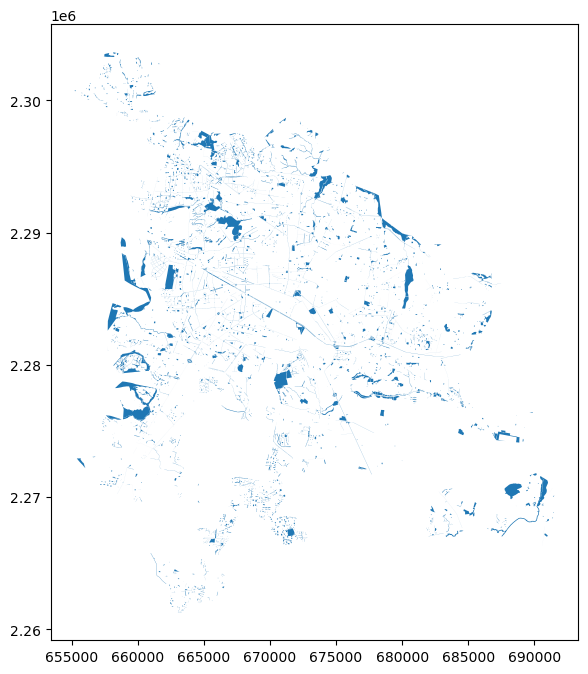

In [5]:
#gdf.plot()
f, axx = plt.subplots(1, figsize=(8, 8))
axx = gdf.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
plt.show()
#trabajar con resolución 11
#city: gdl

### GeoDataFrame Object of 'Guadalajara' in Hexagons

In [3]:
hex_schema = "hexgrid"
hex_table = "hexgrid_8_city"
c = 'Guadalajara'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"metropolis\" LIKE \'{c}\''
hex_gdl = aup.gdf_from_query(query, geometry_col='geometry')
hex_gdl.head(5)

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-103.60989 20.39686, -103.61044 20.4...",8849abc91bfffff,14002,Guadalajara
1,"POLYGON ((-103.61277 20.37822, -103.60824 20.3...",8849abc953fffff,14002,Guadalajara
2,"POLYGON ((-103.58960 20.38835, -103.58905 20.3...",8849abc901fffff,14002,Guadalajara
3,"POLYGON ((-103.66739 20.43582, -103.66683 20.4...",8849abc8adfffff,14002,Guadalajara
4,"POLYGON ((-103.66904 20.45140, -103.66452 20.4...",8849ab5249fffff,14002,Guadalajara


In [7]:
hex_gdl.shape

(4095, 4)

### Plot 'Hexagons-Guadalajara'

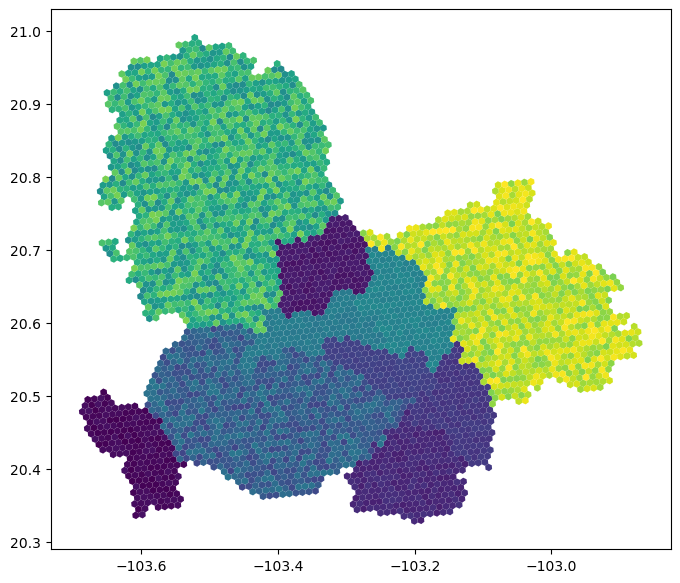

In [8]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = hex_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [4]:
gdf = gdf.to_crs(hex_gdl.crs)
print("CRS of gdf:", gdf.crs)
print("CRS of hex_gdl:", hex_gdl.crs)

CRS of gdf: epsg:4326
CRS of hex_gdl: epsg:4326


### Intersección Espacial

In [10]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Espacios públicos", zoom_to_layer=True)
m.add_gdf(hex_gdl, layer_name="Hexagonos", zoom_to_layer=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### Análisis Variables 

#### DataFrame Intersección Espacios Públicos con Hexágonos

In [5]:
inter_Gdl = gpd.sjoin(hex_gdl, gdf, op='intersects')
inter_Gdl

,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,5578,"Carta topográfica1:20,000, INEGI.",Glorieta,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7475,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7477,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
...,...,...,...,...,...,...,...,...
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,278,Instrumentos de planeación urbana. Disponible:...,Espacio verde vecinal,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,279,Instrumentos de planeación urbana. Disponible:...,Espacio verde vecinal,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,284,Instrumentos de planeación urbana. Disponible:...,Glorieta,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,280,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo


In [12]:
inter_Gdl.shape

(10279, 8)

In [13]:
inter_Gdl.loc[inter_Gdl['hex_id_8'] == '88498c9653fffff']

,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo


#### DataFrame No Intersección

In [14]:
#no_inter_Gdl = gpd.overlay(hex_gdl, gdf, how='difference')
no_inter_Gdl = hex_gdl[~hex_gdl.index.isin(inter_Gdl.index)]
no_inter_Gdl

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-103.60989 20.39686, -103.61044 20.4...",8849abc91bfffff,14002,Guadalajara
1,"POLYGON ((-103.61277 20.37822, -103.60824 20.3...",8849abc953fffff,14002,Guadalajara
2,"POLYGON ((-103.58960 20.38835, -103.58905 20.3...",8849abc901fffff,14002,Guadalajara
3,"POLYGON ((-103.66739 20.43582, -103.66683 20.4...",8849abc8adfffff,14002,Guadalajara
4,"POLYGON ((-103.66904 20.45140, -103.66452 20.4...",8849ab5249fffff,14002,Guadalajara
...,...,...,...,...
4090,"POLYGON ((-102.93423 20.66349, -102.92968 20.6...",88498c9901fffff,14124,Guadalajara
4091,"POLYGON ((-103.26340 20.70318, -103.25886 20.7...",88498c9511fffff,14124,Guadalajara
4092,"POLYGON ((-102.97021 20.68372, -102.96567 20.6...",88498c99cdfffff,14124,Guadalajara
4093,"POLYGON ((-103.04243 20.77395, -103.04698 20.7...",88498c8a53fffff,14124,Guadalajara


In [15]:
no_inter_Gdl.shape

(3250, 4)

In [16]:
no_inter_Gdl.loc[no_inter_Gdl['hex_id_8'] == '88498c9653fffff']

,geometry,hex_id_8,CVEGEO,metropolis


Encontrar si funcionó la separación

In [17]:
values_set1 = set(inter_Gdl['hex_id_8'])
values_set2 = set(no_inter_Gdl['hex_id_8'])

# Find the common values (intersection) between the two sets
common_values = values_set1.intersection(values_set2)

# Get the count of common values
count_common_values = len(common_values)

# Print the count of common values
print(f'Total common values between inter_Gdl and no_inter_Gdl: {count_common_values}')

Total common values between inter_Gdl and no_inter_Gdl: 0


In [18]:
inter_Gdl.isna().sum()

geometry       0
hex_id_8       0
CVEGEO         0
metropolis     0
index_right    0
Fuente         0
Tipo           0
Uso            0
dtype: int64

In [19]:
no_inter_Gdl.isna().sum()

geometry      0
hex_id_8      0
CVEGEO        0
metropolis    0
dtype: int64

In [20]:
inter_Gdl['Uso'].unique()

array(['Uso recreativo', 'Sin uso recreativo'], dtype=object)

### Definir que espacios verdes nos interesan

De acuerdo a Sudipto, Roy; Byrne, Jason y Pickering, Catherine (2012), “A systematic quantitative review of urban tree benefits, costs, and assessment methods across cities in different climatic zones”, Urban Forestry & Urban Greening, 11 (4), Amsterdam, Elsevier, pp. 351-363, doi.org/10.1016/j.ufug.2012.06.006 [ Links ], Las áreas verdes públicas incluyen parques, plazas y jardines, bosques urbanos, campos deportivos, bordos y canales, jardines comunitarios, camellones y áreas naturales protegidas

In [6]:
EspVerde = inter_Gdl.loc[inter_Gdl['Tipo'].isin(['Parque','Plaza','Área natural','Unidad deportiva','Espacio verde vecinal',
   'Área natural protegida'])]
EspVerde['Tipo'].unique()

array(['Parque', 'Plaza', 'Espacio verde vecinal', 'Área natural',
       'Unidad deportiva', 'Área natural protegida'], dtype=object)

In [22]:
#EspVerde.head()

In [7]:
EspNoVerde = inter_Gdl.loc[~inter_Gdl['Tipo'].isin(['Parque', 'Plaza', 'Área natural', 'Unidad deportiva', 'Espacio verde vecinal', 'Área natural protegida'])]
EspNoVerde['Tipo'].unique()

array(['Glorieta', 'Camellón'], dtype=object)

In [24]:
EspNoVerde.head()

,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,5578,"Carta topográfica1:20,000, INEGI.",Glorieta,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7475,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7477,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
259,"POLYGON ((-103.33472 20.68849, -103.33018 20.6...",88498c9419fffff,14039,Guadalajara,7477,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,1664,"Digitalizado por IIEG, con base en las Capacid...",Glorieta,Uso recreativo


### Exportamos los hexágonos con información de NDMI

In [8]:
hex_schema = "raster_analysis"
hex_table = "ndmi_analysis_hex"
c = 'Guadalajara'
n = '11'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" LIKE \'{c}\' AND \"res\" = {n}'
ndmi_gdl = aup.gdf_from_query(query, geometry_col='geometry')
ndmi_gdl.head(10)

,hex_id,geometry,res,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,city
0,8b49ab4b261efff,"POLYGON ((-103.38872 20.75207, -103.38855 20.7...",11,-0.024430,0.088269,-0.045940,0.125081,-0.108787,0.233868,0.000099,Guadalajara
1,8b49ab4b2694fff,"POLYGON ((-103.38507 20.75226, -103.38490 20.7...",11,-0.001659,0.048773,-0.011628,0.100045,-0.044546,0.144592,-0.000135,Guadalajara
2,8b49ab4b26eafff,"POLYGON ((-103.39028 20.75465, -103.39011 20.7...",11,0.004639,0.078975,-0.003485,0.129107,-0.105572,0.234678,0.000270,Guadalajara
3,8b49ab4b271dfff,"POLYGON ((-103.38996 20.74874, -103.38979 20.7...",11,0.099768,0.052265,0.098254,0.175194,0.033170,0.142024,-0.000491,Guadalajara
4,8b49ab4b2613fff,"POLYGON ((-103.38830 20.75179, -103.38812 20.7...",11,-0.028204,0.106004,-0.051343,0.154841,-0.123025,0.277866,0.000392,Guadalajara
5,8b49ab4b27a6fff,"POLYGON ((-103.38688 20.74775, -103.38671 20.7...",11,-0.014251,0.055812,-0.033390,0.107957,-0.055972,0.163930,0.000133,Guadalajara
6,8b49ab4b2793fff,"POLYGON ((-103.38532 20.74982, -103.38514 20.7...",11,0.005626,0.044411,-0.002412,0.097986,-0.027236,0.125222,0.000014,Guadalajara
7,8b49ab4b265bfff,"POLYGON ((-103.39208 20.75480, -103.39191 20.7...",11,0.143926,0.055587,0.130723,0.241717,0.074088,0.167628,0.000376,Guadalajara
8,8b49ab4b2789fff,"POLYGON ((-103.38797 20.75053, -103.38779 20.7...",11,-0.000564,0.107075,-0.037318,0.162610,-0.089739,0.252348,-0.001059,Guadalajara
9,8b49ab4b2664fff,"POLYGON ((-103.39332 20.75147, -103.39315 20.7...",11,-0.034403,0.052683,-0.047964,0.072917,-0.068646,0.141563,-0.000046,Guadalajara


In [26]:
ndmi_gdl.shape

(400000, 11)

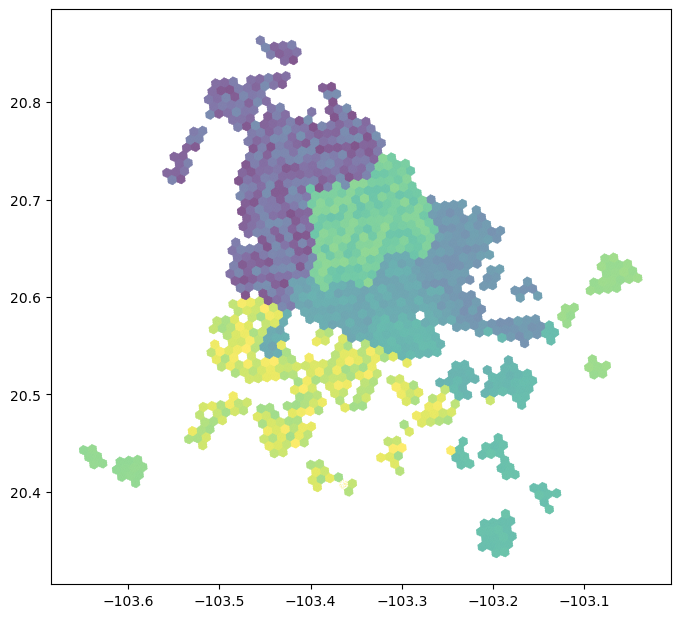

In [27]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = ndmi_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

### Nos damos cuenta que tenemos bastantes hexágonos faltantes. Hay que intentar rellenarlos con la base de datos de hexágonos de la zona metropolitana de gdl 'hex_gdl'

In [29]:
hexagonos_comunes = set(hex_gdl['hex_id_8']).intersection(set(ndmi_gdl['hex_id']))

# Crear un nuevo GeoDataFrame con los hexágonos comunes.
hexagonos_comunes_gdf = hex_gdl[hex_gdl['hex_id_8'].isin(hexagonos_comunes)]

# Mostrar el GeoDataFrame resultante.
print(hexagonos_comunes_gdf)

Empty GeoDataFrame
Columns: [geometry, hex_id_8, CVEGEO, metropolis]
Index: []


In [30]:
poligonos_comunes = set(hex_gdl['geometry']).intersection(set(ndmi_gdl['geometry']))

# Crear un nuevo GeoDataFrame con los hexágonos comunes.
poligonos_comunes_gdf = hex_gdl[hex_gdl['geometry'].isin(poligonos_comunes)]

# Mostrar el GeoDataFrame resultante.
print(poligonos_comunes_gdf)

Empty GeoDataFrame
Columns: [geometry, hex_id_8, CVEGEO, metropolis]
Index: []


Vemos que no tienen ni un solo hexágono similar, ni un solo poligono similar. Entonces aplicaremos modificaciones a una notebook que ya existe para fill hexagons.

## Ya que no he encontrado una forma de rellenarlos, seguiré así incompleto

In [9]:
ndmi_gdl = ndmi_gdl.set_crs("EPSG:4326")
EspVerde =EspVerde.set_crs("EPSG:4326")
EspNoVerde = EspNoVerde.set_crs("EPSG:4326")

In [32]:
ndmi_gdl.head(2)

,hex_id,geometry,res,ndmi_mean,ndmi_std,ndmi_median,ndmi_max,ndmi_min,ndmi_diff,ndmi_tend,city
0,8b49ab4b261efff,"POLYGON ((-103.38872 20.75207, -103.38855 20.7...",11,-0.024430,0.088269,-0.045940,0.125081,-0.108787,0.233868,0.000099,Guadalajara
1,8b49ab4b2694fff,"POLYGON ((-103.38507 20.75226, -103.38490 20.7...",11,-0.001659,0.048773,-0.011628,0.100045,-0.044546,0.144592,-0.000135,Guadalajara


In [10]:
EspVerde.drop(columns=['index_right','Fuente','Uso'], inplace=True)
EspVerde.head(2)

,geometry,hex_id_8,CVEGEO,metropolis,Tipo
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,Parque
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,Parque


In [11]:
EspNoVerde.drop(columns=['index_right','Fuente','Uso'], inplace=True)
EspNoVerde.head(2)

,geometry,hex_id_8,CVEGEO,metropolis,Tipo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,Glorieta
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,Camellón


In [12]:
inter_EspVerde = gpd.sjoin(ndmi_gdl, EspVerde, op='intersects')
inter_EspVerde.shape

(1914977, 16)

In [13]:
not_intersecting = ndmi_gdl[~ndmi_gdl.index.isin(inter_EspVerde.index)]
not_intersecting.shape

(134231, 11)

In [ ]:
inter_EspNoVerde = gpd.sjoin(ndmi_gdl, EspNoVerde, op='intersects')
inter_EspNoVerde.shape

In [ ]:
media_mediaa = not_intersecting['ndmi_mean'].mean()
media_stdd = not_intersecting['ndmi_std'].mean()
media_medianaa = not_intersecting['ndmi_median'].mean()
media_maxx = not_intersecting['ndmi_max'].mean()
media_minn = not_intersecting['ndmi_min'].mean()
media_difff = not_intersecting['ndmi_diff'].mean()
media_tendd = not_intersecting['ndmi_tend'].mean()

print(f" El índice de húmedad de los hexagonos que no intersectan con espacios públicos verdes porque faltan muchos hexágonos \n ndmi_mean: {media_mediaa}\t ndmi_std: {media_stdd}\n ndmi_median: {media_medianaa}\t ndmi_max: {media_maxx}\n ndmi_min: {media_minn}\t ndmi_diff: {media_difff}\n ndmi_tend: {media_tendd}")

In [ ]:
media_media = inter_EspVerde['ndmi_mean'].mean()
media_std = inter_EspVerde['ndmi_std'].mean()
media_mediana = inter_EspVerde['ndmi_median'].mean()
media_max = inter_EspVerde['ndmi_max'].mean()
media_min = inter_EspVerde['ndmi_min'].mean()
media_diff = inter_EspVerde['ndmi_diff'].mean()
media_tend = inter_EspVerde['ndmi_tend'].mean()

print(f" El índice de húmedad de espacios verdes que se intersectan aunque falten varios hexágonos \n ndmi_mean: {media_media}\t ndmi_std: {media_std}\n ndmi_median: {media_mediana}\t ndmi_max: {media_max}\n ndmi_min: {media_min}\t ndmi_diff: {media_diff}\n ndmi_tend: {media_tend}")

In [29]:
media_mediaNo = inter_EspNoVerde['ndmi_mean'].mean()
media_stdNo = inter_EspNoVerde['ndmi_std'].mean()
media_medianaNo = inter_EspNoVerde['ndmi_median'].mean()
media_maxNo = inter_EspNoVerde['ndmi_max'].mean()
media_minNo = inter_EspNoVerde['ndmi_min'].mean()
media_diffNo = inter_EspNoVerde['ndmi_diff'].mean()
media_tendNo = inter_EspNoVerde['ndmi_tend'].mean()

print(f" El índice de húmedad de espacios no verdes que se intersectan aunque falten varios hexágonos \n ndmi_mean: {media_mediaNo}\t ndmi_std: {media_stdNo}\n ndmi_median: {media_medianaNo}\t ndmi_max: {media_maxNo}\n ndmi_min: {media_minNo}\t ndmi_diff: {media_diffNo}\n ndmi_tend: {media_tendNo}")

 El índice de húmedad de espacios verdes que se intersectan aunque falten varios hexágonos 
 ndmi_mean: -0.01202559091015519	 ndmi_std: 0.06495656312657655
 ndmi_median: -0.023425516689823445	 ndmi_max: 0.1036239527185418
 ndmi_min: -0.08248092329625846	 ndmi_diff: 0.18610487601480014
 ndmi_tend: 0.0002732345318486987


### Exportamos los hexágonos con información NDVI

In [ ]:
hex_schema = "raster_analysis"
hex_table = "ndvi_analysis_hex"
c = 'Guadalajara'
n = '11'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" = \'{c}\' AND \"res\" = {n}'
ndvi_gdl = aup.gdf_from_query(query, geometry_col='geometry')
ndvi_gdl.head(10)

In [ ]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = ndvi_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

### Exportamos los hexágonos con información temperatura

In [ ]:
hex_schema = "raster_analysis"
hex_table = "temperature_analysis_hex"
c = 'Guadalajara'
n = '11'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"city\" = \'{c}\' AND \"res\" = {n}'
temp_gdl = aup.gdf_from_query(query, geometry_col='geometry')
temp_gdl.head(10)

In [ ]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = temp_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()